In [1]:
import os
import matplotlib.pyplot as plt
from mrcnn.config import Config
from mrcnn import model as modellib,utils
from mrcnn import visualize
import yaml
from mrcnn.model import log


from PIL import Image
ROOT_DIR = os.path.abspath("")
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

Using TensorFlow backend.


In [2]:
class ShapesConfig(Config):
    NAME = "shape"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 2
    NUM_CLASSES = 1 +1
    IMAGE_MIN_DIM = 320
    IMAGE_MAX_DIM = 384
    RPN_ANCHOR_SCALES = (8 * 6, 16 * 6, 32 * 6, 64 * 6, 128 * 6)
    TRAIN_ROIS_PER_IMAGE = 100
    STEPS_PER_EPOCH = 100
    VALIDATION_STEPS = 50
class InferenceConfig(ShapesConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)
#model_path = model.find_last()
model_path="/home/ljt/Mask_RCNN/logs/shape20181106T1548/mask_rcnn_shape_0080.h5"

print("Loading weights from ", model_path)

model.load_weights(model_path, by_name=True)


Loading weights from  /home/ljt/Mask_RCNN/logs/shape20181106T1548/mask_rcnn_shape_0080.h5


Re-starting from epoch 80


Processing 1 images
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  640.00000  float64
anchors                  shape: (1, 36828, 4)         min:   -1.41791  max:    2.25080  float32


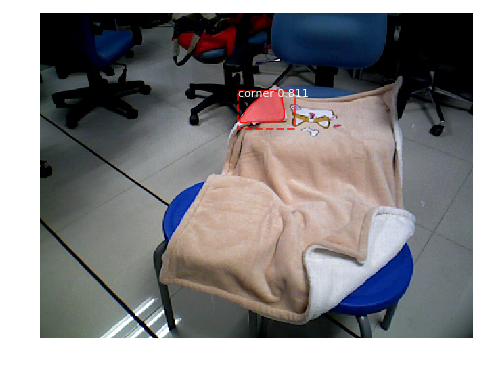

In [ ]:
import skimage
IMG_PATH="/home/ljt/Mask_RCNN/quilt_data/raw_pic/rgb_57.png"
IMG_PATH="/home/ljt/Desktop/25.jpg"
original_image = skimage.io.imread(IMG_PATH)# --- 绝对路径选择图片
results = model.detect([original_image], verbose=1)
class_names=['BG', 'corner']

r = results[0]
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph s
    izes.

    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size * cols, size * rows))
    return ax
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'], ax=get_ax())
